# Advancel ML: Homework №1

## Task 1:

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови! Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

### Решение:

Определим события: 

    A - у подсудимого редкая группа крови c места преступления
    B - подсудимый убийца
    
    
По условию, 

   $ P(A|B)=1, P(A)=0.01 $


Ошибка прокурора в том, что он оценил P($ \overline{A} $), хотя должен был оценить $ P(B|A) $

По формуле Байеса, $ P(B|A) = P(A|B) * P(B) / P(A) = 100*P(B) $

Где $ P(B) $ можно получить из статистики убийств в конкретном регионе/стране. Если предположить, что на 10000 жителей, по статистике, только 1 убийца, то $ P(B|A) = 100*0.0001=0.01 $ 

## Task 2 :

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

### Решение:

Адвокат оценил вероятность, которая не имеет отношения к происходящему. 
В качестве оправдания подсудимого ему нужно было оценить вероятность $ P(\overline{B}|A) $, то есть вероятность невиновности подсудимого, при условии, что у него редкая группа крови с места убийства

Расписывая данную вероятность по теореме Байеса, можно получить что $ P(\overline{B}|A) = 1 - P(B|A) = 0.99 $

# Task 3:

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%. Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного). Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

## Решение:

Пусть, d - факт полезни случайного человека, t - результат теста, FPTerror - False Positive вероятность ошибки теста (ошибка первого рода), FNTerror - False Negative вероятность ошибки теста

По условию, 

$ P(d) = 0.01 $, $ P(FPTerror) = P(FNTerror)=0.05 $

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
d=0.01
EPS=1e-9

def probability_covid(d,FPTerror,FNTerror,t):
    if t==True:
        return (1 - FNTerror) * d / ((1 - FNTerror) * d + FPTerror * (1 - d))
    else:
        return FNTerror * d / (FNTerror * d + (1 - FPTerror) * (1 - d))

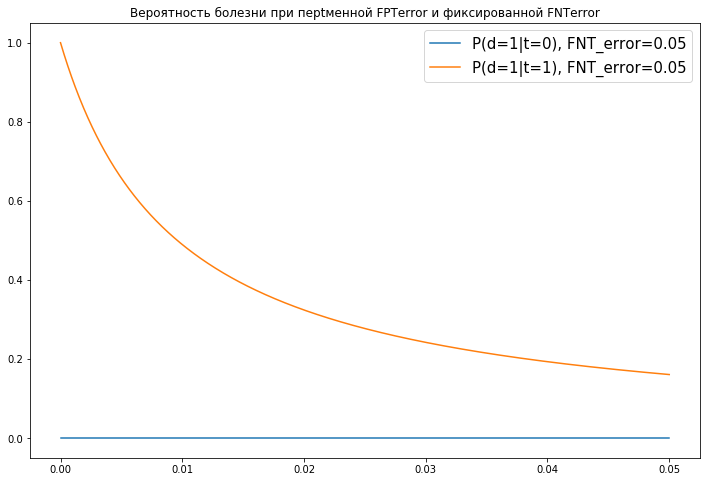

In [89]:

FP = np.linspace(0, 0.05, 1000)
FN = np.linspace(0, 0.05, 1000)

plt.figure(figsize=(12,8))
plt.title('Вероятность болезни при переменной FPTerror и фиксированной FNTerror')
plt.plot(FP, probability_covid(d,FPTerror=FP, FNTerror=0.05, t=False), label='P(d=1|t=0), FNT_error=0.05')
plt.plot(FP, probability_covid(d,FPTerror=FP, FNTerror=0.05, t=True), label='P(d=1|t=1), FNT_error=0.05')
      
plt.legend(fontsize=15)



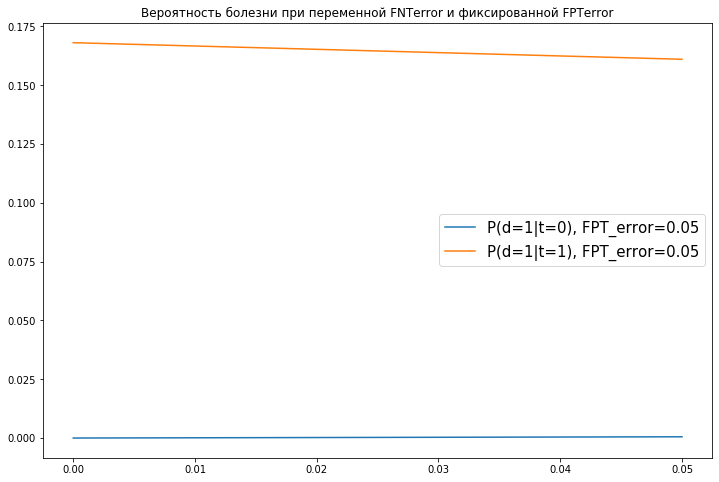

In [90]:
plt.figure(figsize=(12,8))
plt.title('Вероятность болезни при переменной FNTerror и фиксированной FPTerror')

plt.plot(FN, probability_covid(d,FPTerror=0.05, FNTerror=FN,  t=False), label='P(d=1|t=0), FPT_error=0.05') 
plt.plot(FN, probability_covid(d,FPTerror=0.05, FNTerror=FN,  t=True), label='P(d=1|t=1), FPT_error=0.05') 
      
plt.legend(fontsize=15)

## Вывод: 

Видно, что минимизация FPTerror (False positive) ошибки теста приводит к тому, что врачи смогут достоверно утверждать, что человек болен при положительность тесте. Это и требуется от медицины в ситуации пандемии. 

Поэтому минимизировать лучше FPTerror. 
